<a href="https://colab.research.google.com/github/shayekh00/A-representation-of-NYC-Airbnb-Open-Data/blob/master/Air_BnB_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/My Drive/Colab Notebooks/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np

In [0]:
df = pd.read_csv('Datasets/AB_NYC_2019.csv')

#**Data Exploration and Cleaning**

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.columns.values

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
(df['last_review'].isnull() == df['reviews_per_month'].isnull() ).all

<bound method Series.all of 0        True
1        True
2        True
3        True
4        True
         ... 
48890    True
48891    True
48892    True
48893    True
48894    True
Length: 48895, dtype: bool>

In [0]:
df.loc[df['reviews_per_month'].isnull(),'reviews_per_month' ]= 0

In [0]:
df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Which hosts are the busiest and why**

Brooklyn and Manhattan are the busiest because they have the highest demands which corrosponds to more people

In [13]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
data=df.copy()
data= (data.groupby(['neighbourhood_group'] )['host_id'])
#data= data.get_group('Brooklyn')
data= data.get_group('Manhattan')
data=data.to_list()
print(data[1])


4632


In [0]:
import folium  
from folium import plugins

ny_map = folium.Map(location=[40.7, -74],zoom_start =10)
data_loc= df[['latitude','longitude']].values
data_loc =data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(ny_map)
ny_map

In [36]:
for gp in set(df['neighbourhood_group']):  
  print(df.loc[df['neighbourhood_group']==gp].groupby(['neighbourhood_group','neighbourhood']).agg({'price':['count','mean']}).sort_values(by=('price', 'mean'),ascending=False).head()  )
  print()

                                    price            
                                    count        mean
neighbourhood_group neighbourhood                    
Queens              Neponsit            3  274.666667
                    Breezy Point        3  213.333333
                    Jamaica Estates    19  182.947368
                    Arverne            77  171.779221
                    Belle Harbor        8  171.500000

                                     price            
                                     count        mean
neighbourhood_group neighbourhood                     
Brooklyn            Sea Gate             7  487.857143
                    Cobble Hill         99  211.929293
                    Brooklyn Heights   154  209.064935
                    DUMBO               36  196.305556
                    Vinegar Hill        34  187.176471

                                   price            
                                   count        mean
neighbourhood_group 

In [0]:
top_hosts=df['host_id'].value_counts().head(10)
#top_hosts

In [0]:
for index, value in top_hosts.items():
  #print(index)
  hosted_by_id = df[df['host_id']== index]
  print(hosted_by_id['neighbourhood_group'].item)
  
#hosted_by_id = df[df['host_id']== 219517861]
#print(hosted_by_id['neighbourhood_group'].head(1)  )

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

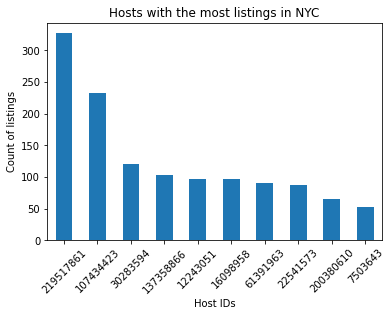

In [81]:
viz_1=top_hosts.plot(kind='bar')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

# **What areas have more traffic than others and why is that the case?**

The same reason as above.
The more the price,more the demand,more the peoople this higher traffic.



In [15]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [16]:
data=df.copy()
data= (data.groupby(['neighbourhood_group'] )['host_id'])
#data= data.get_group('Brooklyn')
data= data.get_group('Manhattan')
data=data.to_list()
print(data[1])


4632


# **Are there any relationships between prices, number of reviews, and the number of days that a given listing is booked?**

Correlation between Price & No of Reviews

In [0]:
corr= df.corr(method ='pearson') 

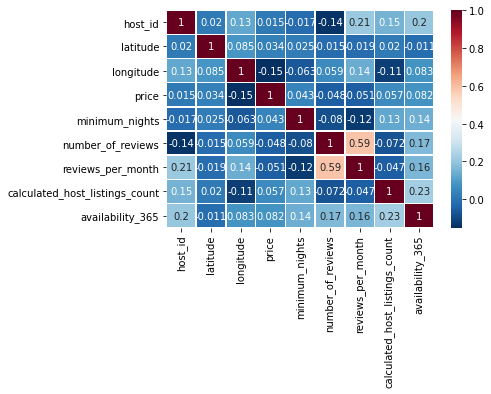

In [24]:
sb.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [42]:
print('Correlation between price and Number of Reviews:  ', corr['price']['number_of_reviews'] )
print('Correlation between price and Number of Nights:  ', corr['price']['minimum_nights'] )
print('Correlation between Number of Nights and Number of Reviews:  ', corr['minimum_nights']['number_of_reviews'] )

Correlation between price and Number of Reviews:   -0.047954226582658625
Correlation between price and Number of Nights:   0.042799334143302656
Correlation between Number of Nights and Number of Reviews:   -0.08011606824162393


In [83]:
#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

price_list_by_n

[       price
 0        149
 3         89
 6         60
 12        89
 15       140
 ...      ...
 48882     40
 48884    190
 48887    170
 48890     70
 48891     40
 
 [20104 rows x 1 columns],        price
 1        225
 2        150
 4         80
 5        200
 7         79
 ...      ...
 48886    200
 48888    125
 48892    115
 48893     55
 48894     90
 
 [21661 rows x 1 columns],        price
 46       130
 77        70
 143      140
 161       79
 181      350
 ...      ...
 48858     68
 48863     93
 48866     58
 48878     45
 48889     65
 
 [5666 rows x 1 columns],        price
 169       70
 249       36
 250       37
 251       37
 256       36
 ...      ...
 48441     40
 48446    100
 48533    450
 48649     54
 48799    235
 
 [373 rows x 1 columns],        price
 171       40
 207       45
 260       90
 261      105
 309       90
 ...      ...
 48783    140
 48792     80
 48795    125
 48796     70
 48805    100
 
 [1091 rows x 1 columns]]

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

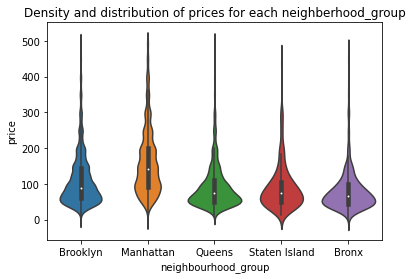

In [85]:
sub_6=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')